# DATA SCIENCE AND BUSINESS ANALYTICS AT "THE SPARKS FOUNDATION"
# Author: Akash Srivastava¶


# TASK 2 : PREDICTION USING UNSUPERVISED ML

## From the given iris dataset, predict the optimum number of clusters and represent it visually.

*Importing the libraries.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
#importing and reaading the dataset
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Number of species in the dataset
dataset.groupby(["Species"]).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Data Visualisation

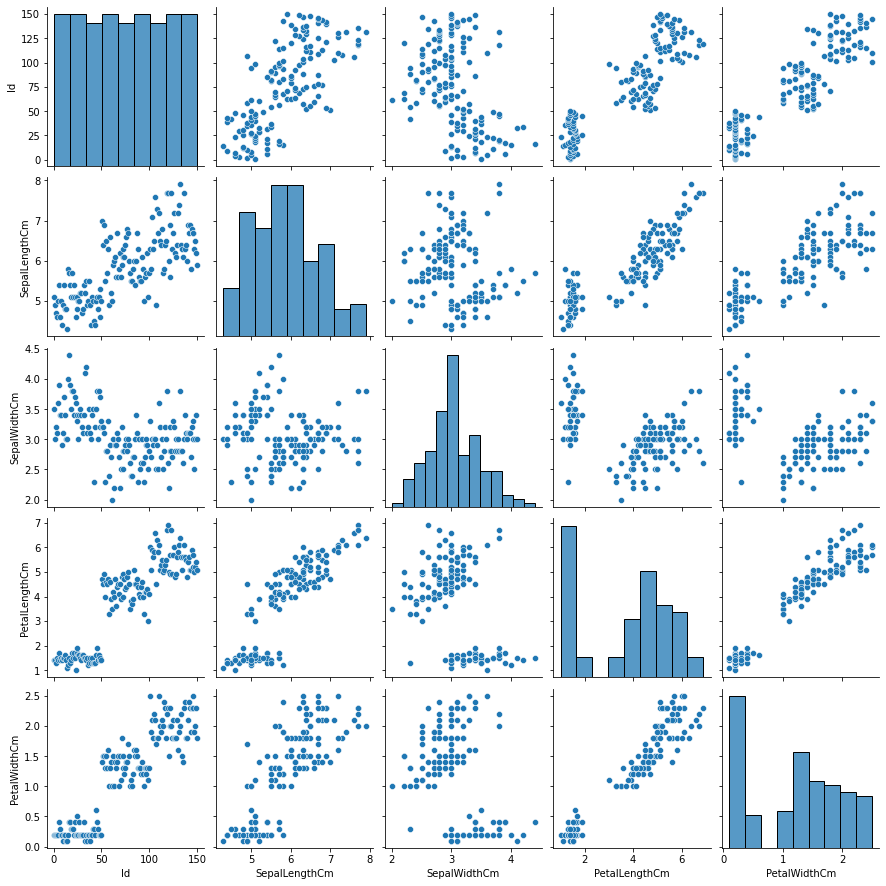

In [9]:
 # To show relation between columns
sns.pairplot(data) 
plt.show()

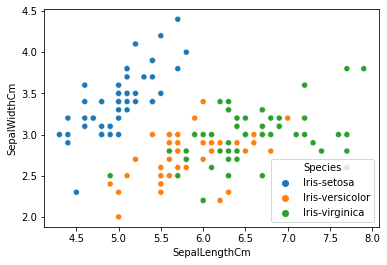

In [11]:
sns.scatterplot(x=data["SepalLengthCm"], y=data["SepalWidthCm"], hue=data["Species"])
plt.show()

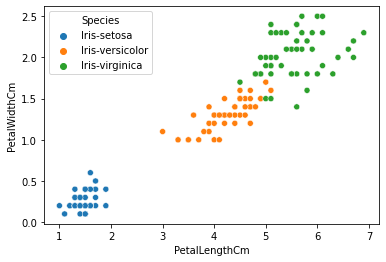

In [12]:
sns.scatterplot(x=data["PetalLengthCm"], y=data["PetalWidthCm"], hue=data["Species"])
plt.show()


###  Finding the optimal number of clusters

In [15]:
X = data.iloc[:, [1,2,3,4]].values

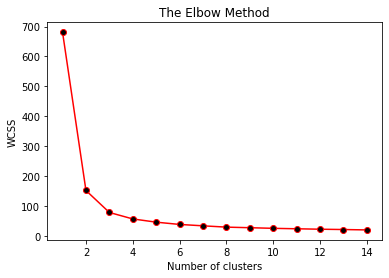

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss,color='red',marker='o',markerfacecolor='black')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

        Optimum number for clusters is near 3 here.

### Finding the model and predicting the output using total of 3 clusters

In [23]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


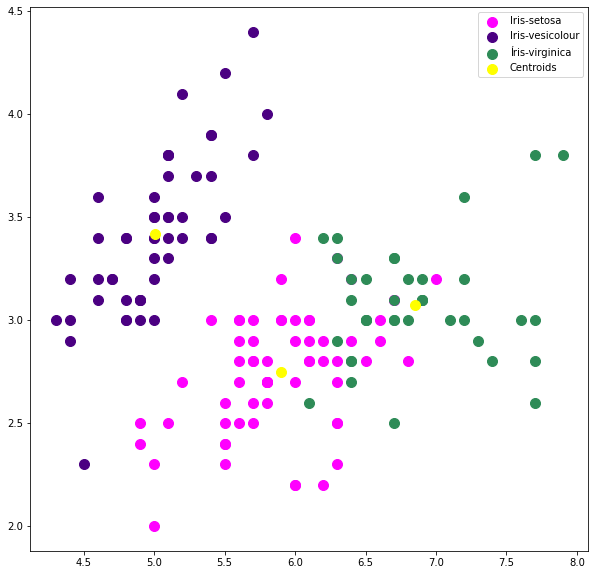

In [25]:

# plotting the clusters 
plt.figure(figsize=(10,10))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans == 0,1],
           s = 100 ,c='magenta',label ='Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],
           s =100, c='indigo',label ='Iris-vesicolour')
plt.scatter(X[y_kmeans ==2 ,0],X[y_kmeans ==2,1],
           s=100,c='seagreen',label ='Íris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s = 100 ,c ='yellow' ,label ='Centroids')
plt.legend()

# THANK YOU !!